# Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
#from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

# Data Collection:

In [2]:
Base_ball_data = pd.read_csv("baseball.csv")
Base_ball_data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# What are the columns?

In [3]:
Base_ball_data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Size of the data:

In [4]:
Base_ball_data.shape

(30, 17)

In [5]:
# Observation: Here we can see that the dataset consists of 30 rows and 17 columns.

# What are the different datatypes present?

In [6]:
Base_ball_data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
# Observation: Here we can see that there are mostly all the columns with "int" datatype and a column "ERA" is with "float" datatype.

# Information of the data:

In [8]:
Base_ball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
# Observation: Here we can see that there are no empty or null-values in any of the columns.

# Statistical Analysisof the data:

In [10]:
Base_ball_data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
# observation: 1) Here we can see that there no null - values in the columns which we can see in the row "Count"
#              2) Also here all the columns are with good difference between "mean and std" but a column "CG" is with low 
# difference between mean and std .

# Checking the null-values in the data:

In [12]:
Base_ball_data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [13]:
# Observation: Here we can see that there are "0" null-values in all the columns.

In [14]:
Base_ball_data.isnull().sum().sum()

0

# Finding null/missing values if any:

In [15]:
Base_ball_data.isnull().values.any()

False

In [16]:
# observation: Here also we can see that there are also no missing values.

# plotting heatmap of null values : 

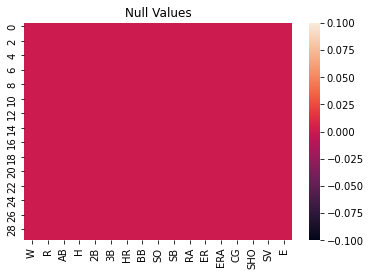

In [17]:
sns.heatmap(Base_ball_data.isnull())
plt.title("Null Values")
plt.show()

In [18]:
# observation: here we can see that there are no null - values can be seen in visualization.

# Exploratory Data Analysis(EDA):

## Checking the correlation of the variables by plotting heatmap:

In [19]:
correlation = Base_ball_data.corr()

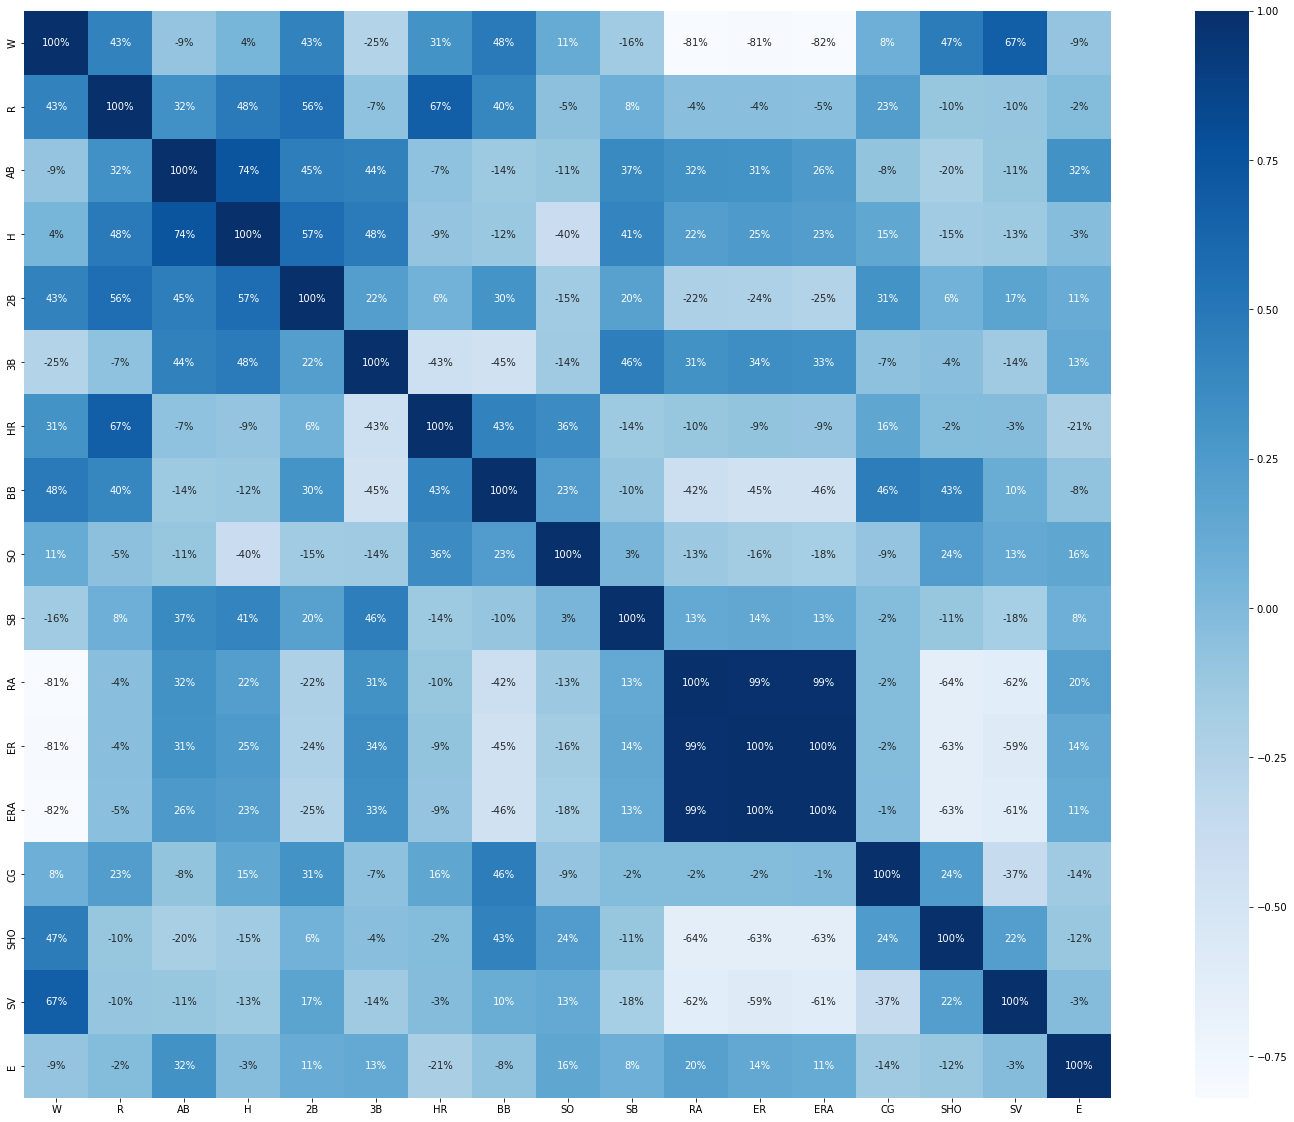

In [20]:
plt.figure(figsize =(30,20))
sns.heatmap(correlation,annot = True,fmt = ".0%",cbar = True,square = True,annot_kws = {'size': 10}, cmap = 'Blues')
plt.show()

In [21]:
# Observation: Here we can see that there is high correlation between "ER and RA","ERA and RA" and the next highest correlation
#                is in between "AB and H". 

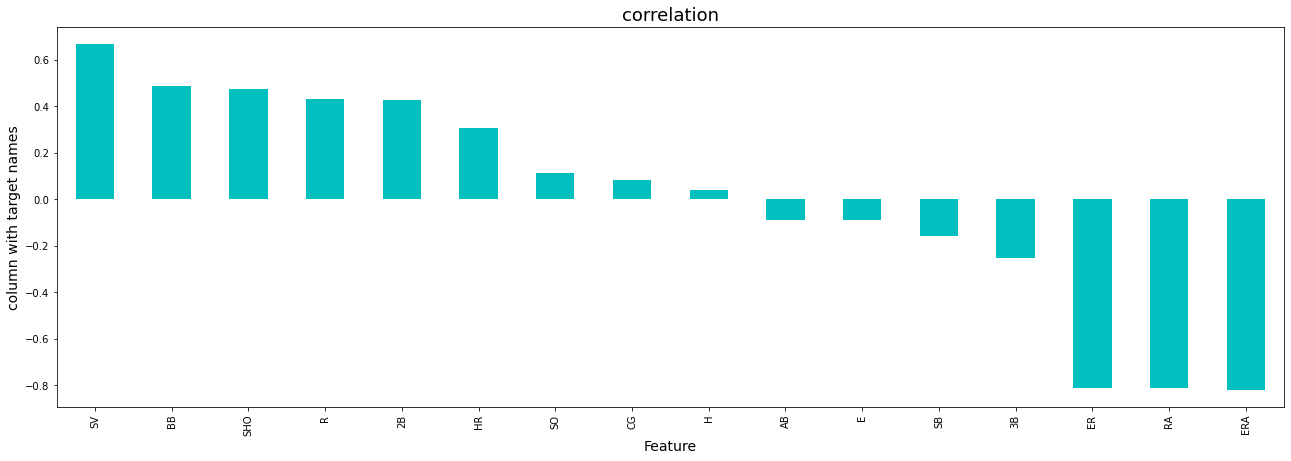

In [22]:
plt.figure(figsize=(22,7))
correlation['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [23]:
# Observation: 1) Here we can see that almost same orrelation exists between "ER","RA","ERA".
#              2) Also we can see that very low correlation exists in "H".

# Visualization of the data:

## Univariate Analysis:

In [24]:
Base_ball_data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# R - "Runs":

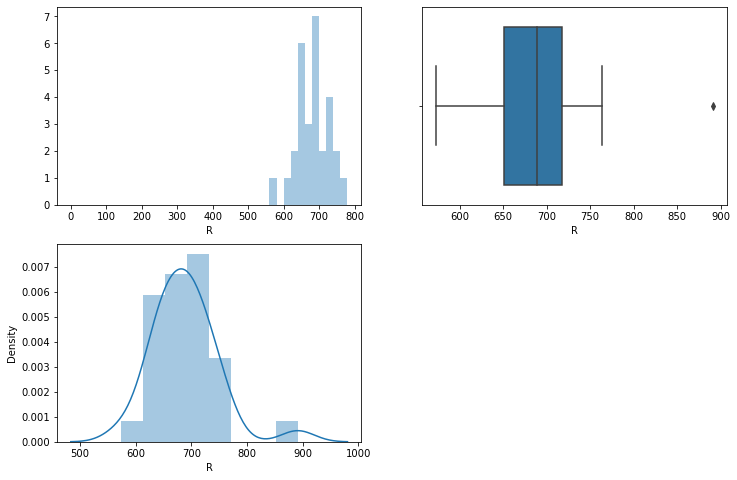

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['R'], kde=False, bins=range(0, 800, 20));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['R']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['R']);

In [26]:
# observation:1) Here we can see that there is an outlier which can be seen in the boxplot and is very far from max-quantile range
# and so probably has no affecton our model building.
#             2) Also we can see that the distribution curve is somewhat skewed towards right and bell-shaped curve also can be seen.

# AB - "At Bats":

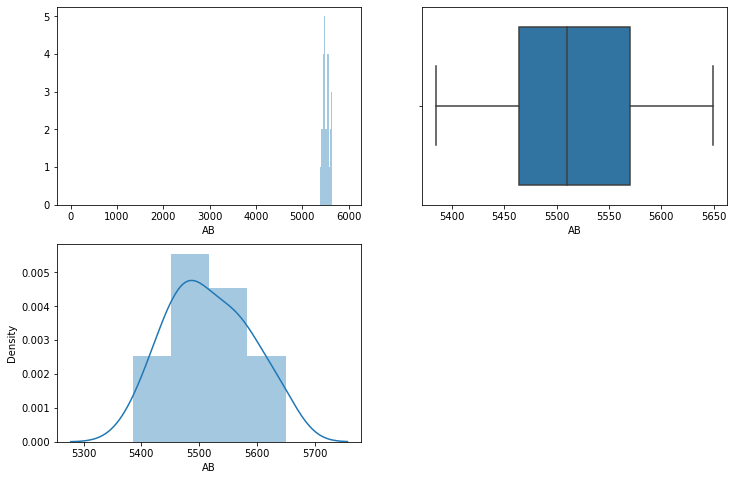

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['AB'], kde=False, bins=range(0, 6000, 25));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['AB']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['AB']);

In [28]:
# Observation: 1) Here we can see that there are no outliers present or can be seen in boxplot.
#              2) Also we can see that there is no such skewness can be seen in the distribution curve.

# H - "Hits":

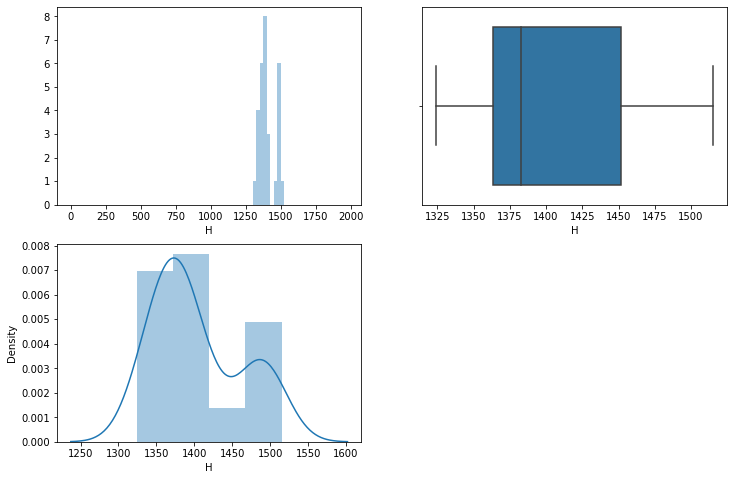

In [29]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['H'], kde=False, bins=range(0, 2000, 25));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['H']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['H']);

In [30]:
# Observation: 1) Here we can see that there are no outliers which can be seen in boxplot.
#              2) Also we can see that the distribution curve is not at all distributed normally.

# 2B - "Doubles":

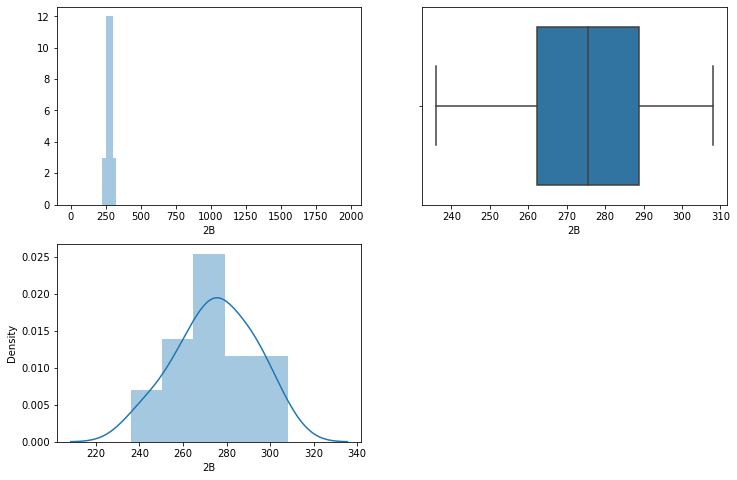

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['2B'], kde=False, bins=range(0, 2000, 25));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['2B']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['2B']);

In [32]:
# Observation: 1) Here we can see that there are no outliers present or can be seen in the boxplot
#              2) Also the distribution curve seems to be normally distributed.

# 3B - "Triples":

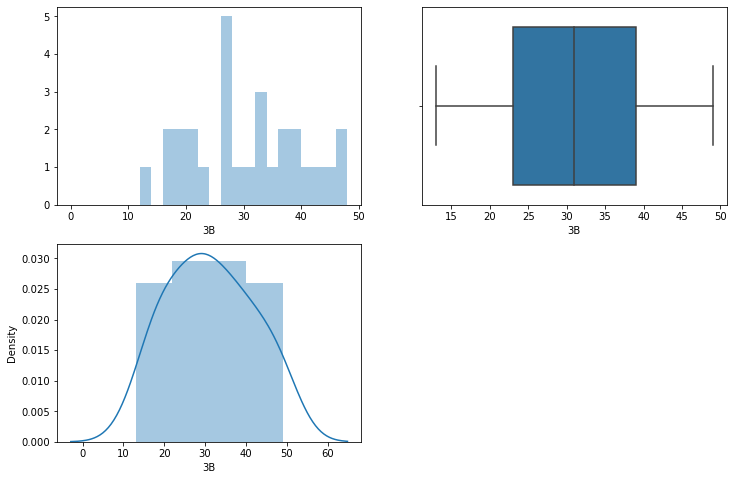

In [33]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['3B'], kde=False, bins=range(0, 50, 2));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['3B']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['3B']);

In [34]:
# Observation: 1) Here we can see that there are no outliers present or can be seen in the boxplot
#              2) Also the distribution curve seems to be normally distributed.

# HR - "Homeruns":

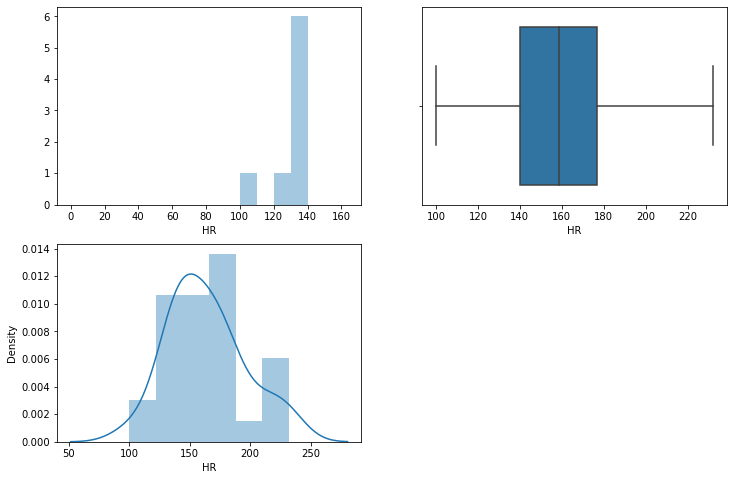

In [35]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['HR'], kde=False, bins=range(0, 150, 10));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['HR']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['HR']);

In [36]:
# Observation: 1) Here we can see that there are no outliers present or can be seen in the boxplot.
#              2) Also the distribution curve can be seen skewed somewhat to the right side.

# BB - "Base on balls" or "Walks":

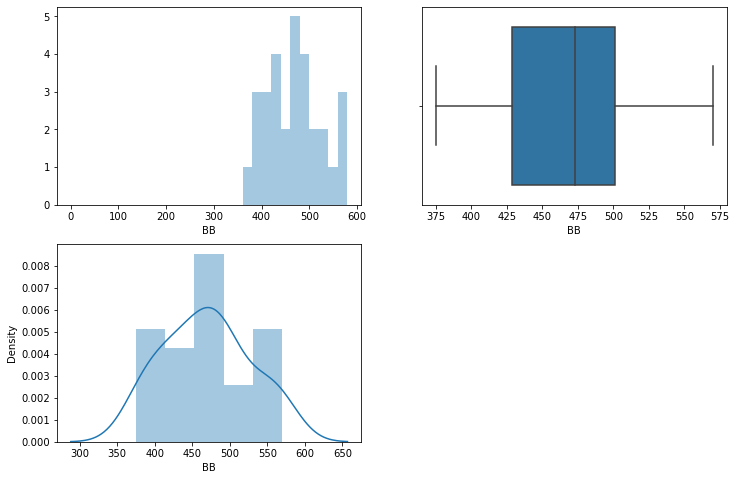

In [37]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['BB'], kde=False, bins=range(0, 600, 20));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['BB']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['BB']);

In [38]:
# Observation: 1) Here we can see that there are no outliers present or can be seen in the boxplot
#              2) Also the distribution curve seems to be normally distributed.

# SO - "StrikeOuts":

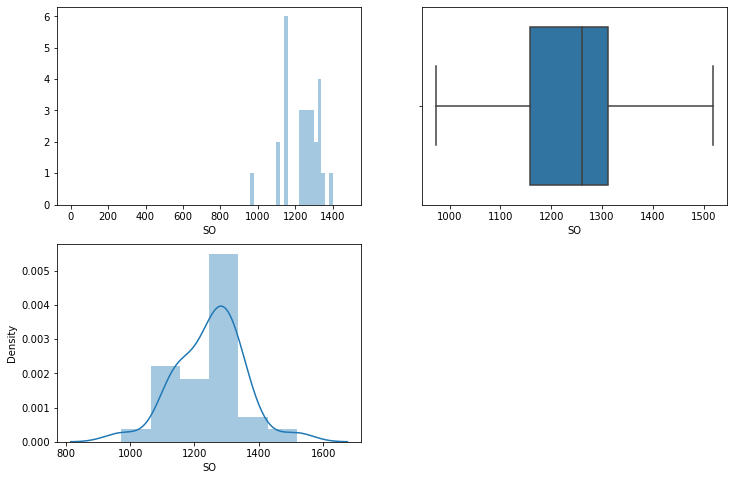

In [39]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['SO'], kde=False, bins=range(0, 1500, 20));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['SO']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['SO']);

In [40]:
# Observation: 1) Here we can see that there are no outliers can be in the boxplot.
#              2) Also can be seen that the distribution curve is not at all distributed normally.

In [41]:
 Base_ball_data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# SB - "Stolen Bases":

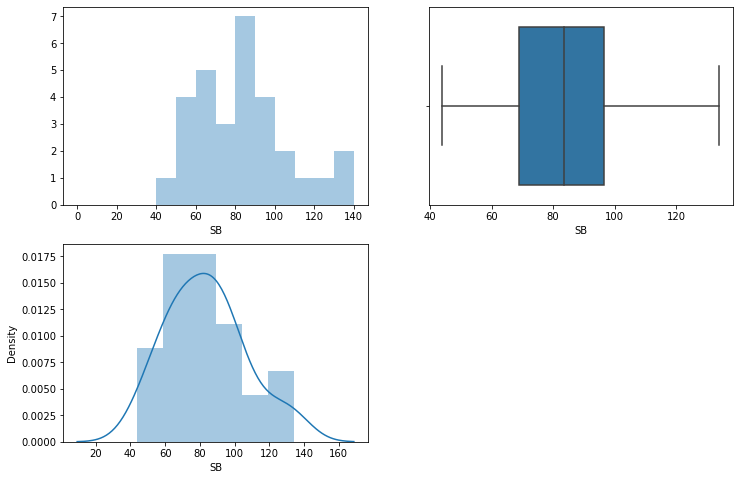

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['SB'], kde=False, bins=range(0, 150, 10));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['SB']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['SB']);

In [43]:
# Observation: 1) Here we can see there are no outliers present or can be seen in the boxplot.
#               2) Also can be seen that the distribution curve is somewhat skewed.

# RA - "Runs Allowed": 

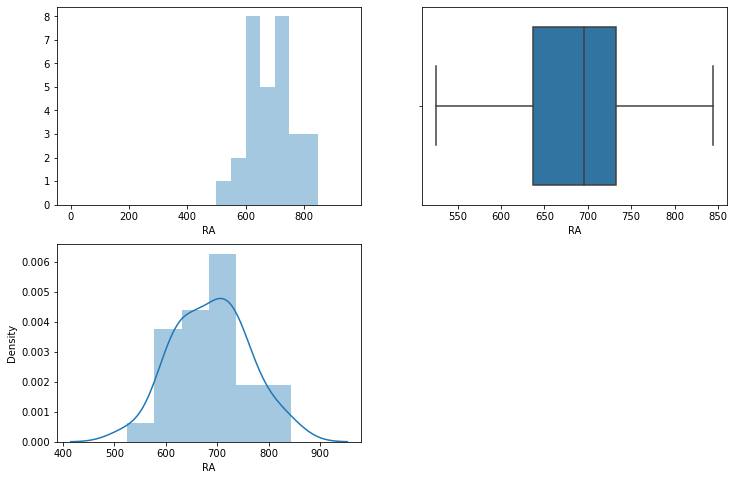

In [44]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['RA'], kde=False, bins=range(0, 1000, 50));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['RA']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['RA']);

In [45]:
# Observation: 1) Here we can see that there are no outliers which can be in boxplot.
#              2) Also wecan see that the distribution curve is probably distributed  normally but with less broad peak.

# ER - "Earned Runs":

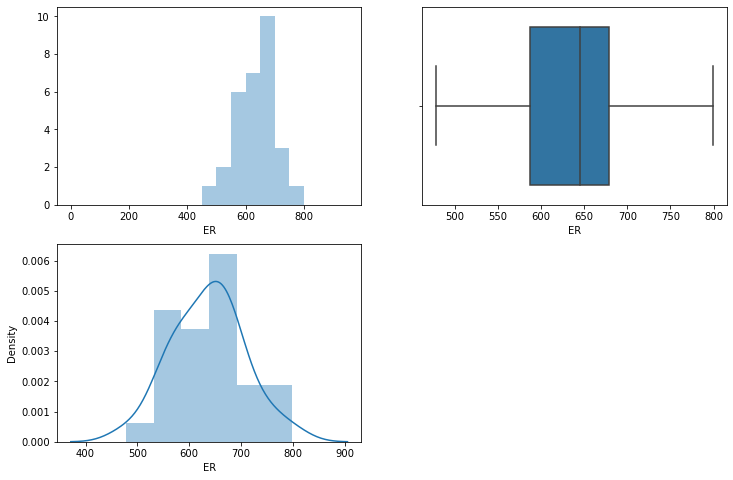

In [46]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['ER'], kde=False, bins=range(0, 1000, 50));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['ER']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['ER']);

In [47]:
# Observation: Here we can see that there are no outliers present in the boxplot and also we can see that the distribution curve
#              seems to be same as "RA".

# ERA - "Earned Run Average":

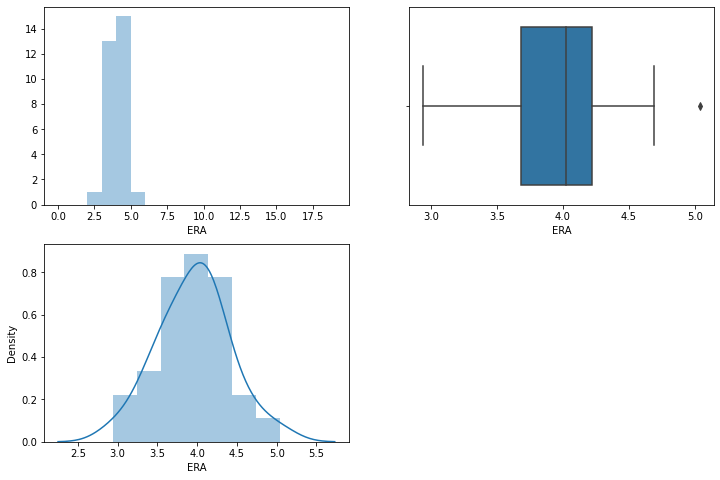

In [48]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['ERA'], kde=False, bins=range(0, 20, 1));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['ERA']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['ERA']);

In [49]:
# observation: Here we can see that there is an present or can be seen in boxplot same as "R"  and also the distribution curve
# somewhat distributed normally but the peak is not at all broad.

# CG - "Complete Games":

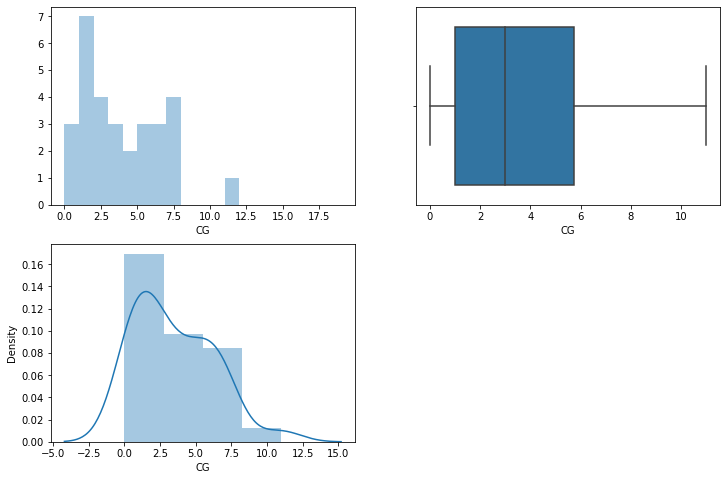

In [50]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['CG'], kde=False, bins=range(0, 20, 1));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['CG']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['CG']);

In [51]:
# Observation: Here we can see that there are no outliers can be seen in boxplot and also we can see that the distribution curve
# is not at all normally distributed.

# SHO - "Shutouts":

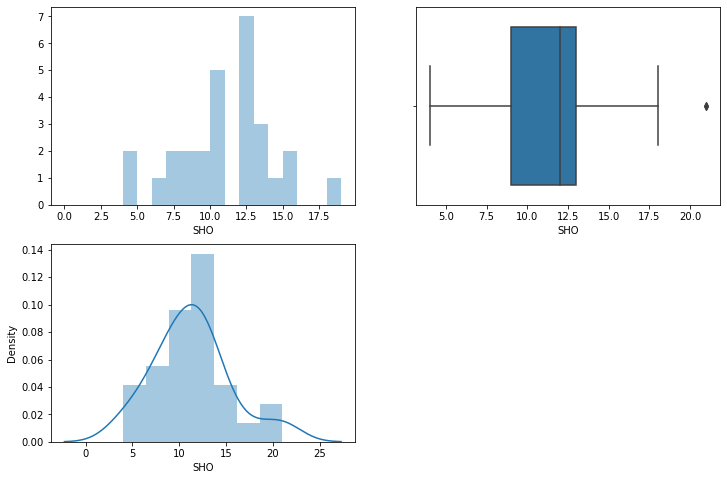

In [52]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['SHO'], kde=False, bins=range(0, 20, 1));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['SHO']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['SHO']);

In [53]:
# observation: Here we can see that there is an outlier present in the boxplot same as R and ERA but is very far away from max-qu-
# -artile and the distribution curve seems to be skewed slightly towards rightside.

# SV - "Saves":

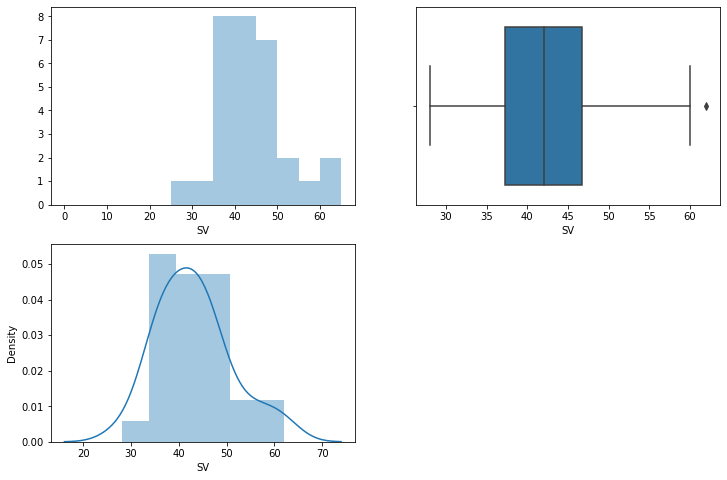

In [54]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['SV'], kde=False, bins=range(0, 70, 5));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['SV']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['SV']);

In [55]:
# observation: Here we cansee that there is an outlier present which is seen near to the max-quartle and the distribution curve
# is skewed somewhat towards right.

# E - "Errors":

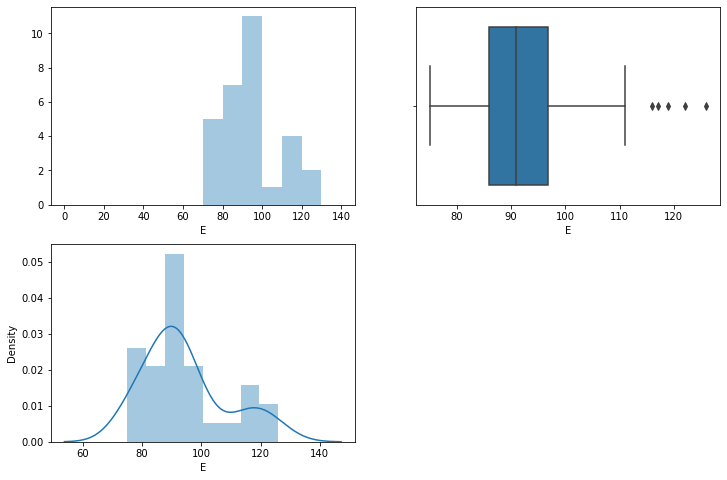

In [56]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Base_ball_data['E'], kde=False, bins=range(0, 150, 10));
plt.subplot(2,2,2)
sns.boxplot(Base_ball_data['E']);
plt.subplot(2,2,3)
sns.distplot(Base_ball_data['E']);

In [57]:
# Observation: here we can see that there are outliers present in the boxplot and are near to max-quartle and the distribution
# curve is not at all skewed and probably these outliers may effect our model building.

In [58]:
# Observation: here we can see that the columns "R","RA","ERA","SV","E" and the major outliers which has possibility to affect
# our model building is "E" and the outliers of the other columns are far enough from the max-quartile and there is very chance
# chance of their effect on our model building.

In [59]:
# here we have plotted the graphs and alsodetedted the outliers present and so now we will treat the outliers in the column "E".

# Removal of outliers through "Z - Score - Method": 

In [60]:
from scipy.stats import zscore
z = np.abs(zscore(Base_ball_data))
z.shape

(30, 17)

In [61]:
threshold = 3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [62]:
Base_ball_data_new = Base_ball_data[(z<3).all(axis = 1)]
print(Base_ball_data.shape)
print(Base_ball_data_new.shape)

(30, 17)
(29, 17)


In [63]:
# observation: here we can see that there is reduce in the number of total records(rows) and so there is reduce in the data.

# Loss Percentage Calculation:

In [64]:
loss_percent = (30-29)/30*100
print(loss_percent)

3.3333333333333335


In [65]:
# Observation: Here we can see that there is loss of 3.3% of the data , so it is negligible.

In [66]:
Base_ball_data_new.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [67]:
# observation: here we can see that there is reduction in the number of records which means outliers are treated.

# IQR method:

In [68]:
feature1 = Base_ball_data[['E']]
feature2 = feature1
feature2 = Base_ball_data["R"]
feature3 = feature2
feature3 = Base_ball_data["SHO"]
feature4 = feature3
feature4 = Base_ball_data["SV"]
features = feature4

In [69]:
Q1 = features.quantile(0.25)  # 1st quantile

Q3 = features.quantile(0.75)  # 3rd quantile

IQR = Q3-Q1

data_removed = Base_ball_data[~((Base_ball_data <(Q1 - 1.5 * IQR)) | (Base_ball_data > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [70]:
data_removed.shape

(0, 17)

In [71]:
# Observation: here also we have tried to remove outliers from the dataset but we are not able to remove the outliers as the 
# number of records removed can be seen as "0", so we will consider Z - Score method itself here.

# Finding Skewness in the data:

In [72]:
Base_ball_data_new.shape

(29, 17)

In [73]:
Base_ball_data_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [74]:
# Observation: here we can see that the skewness is present or can be seen in the columns : "SV" and "E"

In [75]:
Base_ball_data_new['SV'] = np.sqrt(Base_ball_data_new ['SV'])


In [76]:
Base_ball_data_new['E'] = np.sqrt(Base_ball_data_new ['E'])


In [77]:
Base_ball_data_new['CG'] = np.sqrt(Base_ball_data_new ['CG'])


In [78]:
Base_ball_data_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO    0.526943
SV     0.370280
E      0.714966
dtype: float64

In [79]:
# Observation: Here we can see that there is reduction in the skewness of the columns which are highly skewed before.

# Data Preprocessing:

## Separating the independent and the dependent variables into x and y:

In [80]:
x = Base_ball_data_new.drop("W", axis=1)
y = Base_ball_data_new["W"]

In [81]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,1.414214,8,7.483315,9.380832
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,1.414214,12,6.708204,9.273618
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,3.316625,10,6.164414,8.888194
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,2.645751,9,6.082763,10.049876
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,2.645751,12,5.916080,9.273618


In [82]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

# Scaling the data with Standard Scaler:

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.253549,-0.813262,1.602631,-0.454325
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.253549,0.159299,0.255621,-0.607619
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.020463,-0.326982,-0.689393,-1.158698
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.218547,-0.570122,-0.831290,0.502274
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.218547,0.159299,-1.120956,-0.607619


# Model Building:

# Checking the random_state:

In [84]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8167133834422983  on Random_state  62


In [85]:
# Observation: Here we got the accuracy as 81.6% for the random_state = 62

## train_test_split:

## splitting the data at the "maxRs" = 62:

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [87]:
# Observation: here we can see that the data is into 70% training and 30% testing.

# Linear regression:

In [88]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predLR))

R2_score: 0.8167133834422983


In [89]:
# Observation: the R2 Score in Linear Regression is 81.6%

In [90]:
# Mean Absolute Error (MAE)

print(metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predLR)))

3.8103019296029066
19.269985513646766
4.389759163513047


# Random Forest Regressor:

In [91]:
#Checking R2 score for Random Forest Regressor:

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))

R2_Score: 0.742773109441052


In [92]:
# Observation: here we can see that accuracy R2 Score is 71%

# Decision Tree Regressor:

In [93]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predDTR))

R2_Score: 0.3088304368248004


In [94]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predDTR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predDTR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

7.555555555555555
72.66666666666667
8.524474568362947


In [95]:
# Observation: here we can see that accuracy R2 Score is 40.5%

# KNN Regressor:

In [96]:
# Checking R2 score for KNN regressor

knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))

R2_Score: 0.6678158759981214


In [97]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predknn))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predknn))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predknn)))


5.333333333333332
34.92444444444442
5.90969072324808


In [98]:
# Observation: here we can see that accuracy R2 Score is 66.7%

# Support Vector Regressor:

In [99]:
# Checking R2 score for KNN regressor
svr=SVR()
svr.fit(x_train,y_train)

#prediction
predsvr=svr.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predsvr))

R2_Score: 0.13252382353686598


In [100]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predsvr))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predsvr))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

7.1544705342199215
91.20280393530926
9.55001591283016


In [101]:
# Observation: here we can see that accuracy R2 Score is 13%

# Checking the Cross Validation Score:

In [102]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=10).mean())

-2.6508625603481093


In [103]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())

-0.5704191493774757


In [104]:
# Checking cv score for Decision Tree Regression
print(cross_val_score(DTR,x,y,cv=5).mean())

-2.1882832623307635


In [105]:
# Checking cv score for KNN Regression
print(cross_val_score(knn,x,y,cv=5).mean())

0.0015290694356626


In [106]:
# Checking cv score for SVR Regression
print(cross_val_score(svr,x,y,cv=5).mean())

-0.29666688480741815


In [107]:
# Observation: Here we can see that there are the R2 Score is high for "Linear Regression" and so we can consider this model as
# "best fitting model".

# Hyper Parameter Tuning:

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
# Here we chose our best model "Linear regression" :

In [110]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [111]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=None)

In [112]:
GCV.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [113]:
print (" variance : ", GCV.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((GCV.predict(x_test) - y_test) ** 2))

 variance :  -40.42688448759016
Residual sum of squares: 19.27


In [114]:
# Observation : Linear regression is with good accuracy without doing :Grid Search CV".

# Saving the model:

In [115]:
import pickle
filename='W.pkl'
pickle.dump(LR,open(filename,'wb'))

# Conclusion:

In [116]:
loaded_model=pickle.load(open('W.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8167133834422983


In [117]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [118]:
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,88.717248,92.158818,86.854532,95.315466,80.946747,82.547300,58.941012,80.170290,76.812475
Original,57.259984,51.329796,88.815663,78.260794,95.431222,104.749315,105.129524,90.180308,100.142114


Therefore our best model is "Linear Regression" with the accuracy of 81.6%